In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)


11490434/11490434 [==============================] - 0s 0us/step


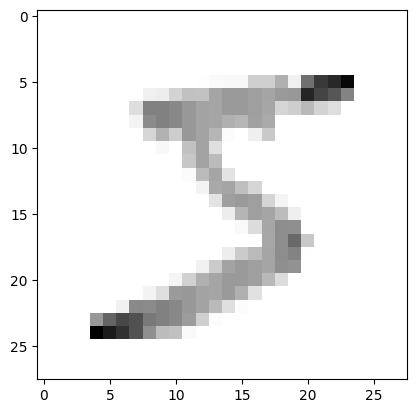

In [ ]:
def draw(n):
	plt.imshow(n,cmap=plt.cm.binary)
	plt.show()

draw(x_train[0])


In [ ]:
#there are two types of models
#sequential is most common, why?

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy']
			)
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2659 - accuracy: 0.9212
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1069 - accuracy: 0.9666
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0732 - accuracy: 0.9773
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0540 - accuracy: 0.9825
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9867
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9887
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0258 - accuracy: 0.9915
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218 - accuracy: 0.9924
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9935
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

In [ ]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.2420 - accuracy: 0.9766
loss->  0.2420147955417633 
acc->  0.9765999913215637


313/313 [==============================] - 1s 2ms/step
label ->  4
prediction ->  4
[0.0000000e+00 6.5310042e-29 1.7993180e-27 7.0269900e-34 1.0000000e+00
 2.6763770e-20 0.0000000e+00 6.4737223e-24 3.0865406e-14 6.0707174e-18]


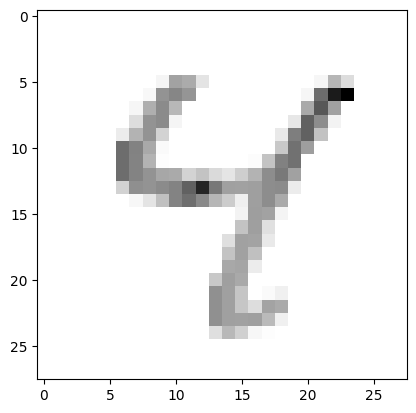

In [ ]:
predictions=model.predict([x_test])
img_no = 6
print('label -> ',y_test[img_no])
print('prediction -> ',np.argmax(predictions[img_no]))
print(predictions[img_no])
draw(x_test[img_no])


In [ ]:
print(y_test)

[7 2 1 ... 4 5 6]


In [ ]:
#saving the model
# .h5 or .model can be used

model.save('mnist_digit')


**Convert to TFLITE model**

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("mnist_digit")
model_no_quant_tflite = converter.convert()

# Save the model to disk
open("mnist_digit.tflite", "wb").write(model_no_quant_tflite)

475516

**Classification using Tensorflow Lite model**

Original label is 7 and predicted label is 7


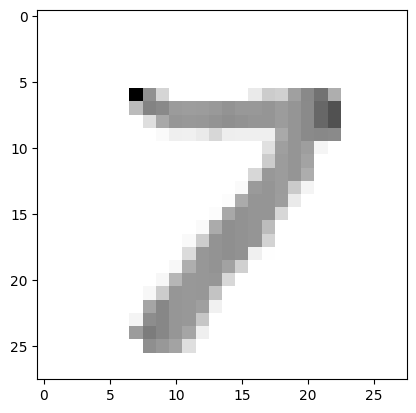

In [ ]:
# Initialize the TFLite interpreter
interpreter = tf.lite.Interpreter(model_path="/content/mnist_digit.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]
#Apply input (here we are applying scaled input from test set)
#Later we shall go for live classification
image_number=34
n=x_test[image_number]
# Invoke the interpreter
interpreter.set_tensor(input_details["index"], [n.astype(np.float32)])
interpreter.invoke()
y_pred = interpreter.get_tensor(output_details["index"])[0]
#set labels for output classes
labels = '''0 1 2 3 4 5 6 7 8 9'''.split()
# save the predicted label
predicted_label = labels[y_pred.argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))
draw(x_test[image_number])

In [ ]:
print(x_test[image_number])

In [ ]:
# Imports PIL module
from PIL import Image
# open method used to open different extension image file
im = Image.open("/content/9.png").convert('L')
new_image = im.resize((28, 28))
x_new=np.array(new_image)
x_new = x_new/255
print(x_new)
# Invoke the interpreter
interpreter.set_tensor(input_details["index"], [x_new.astype(np.float32)])
interpreter.invoke()
y_pred1 = interpreter.get_tensor(output_details["index"])[0]
# save the predicted label
#print(y_pred1)
predicted_label1 = labels[y_pred1.argmax()]
print("Predicted label is:",predicted_label1)
plt.imshow(new_image)